##探索性数据分析（多因子与复合分析）

In [2]:
#正态分布
import numpy as np
import scipy.stats as ss
norm_dist=ss.norm.rvs(size=20)
norm_dist

array([-0.58281675,  0.69235663,  0.62486956,  1.00505651, -0.24577989,
       -1.25232724,  0.00507351, -1.20635072,  1.75234012, -1.66392632,
        0.35703081, -0.38210716,  0.68290624,  2.14556141, -1.28982048,
        0.84333099, -1.3078082 ,  0.64966913,  1.13826336,  0.01257928])

In [3]:
#检验是否符合正态分布
ss.normaltest(norm_dist)

NormaltestResult(statistic=0.7471289772148199, pvalue=0.6882765988657424)

In [4]:
ss.chi2_contingency([[15,95],[85,5]])
#结果依次是 检验统计量，P值，自由度，理论分布

(126.08080808080808,
 2.9521414005078985e-29,
 1,
 array([[55., 55.],
        [45., 45.]]))

In [7]:
#独立分布t检验
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))

Ttest_indResult(statistic=1.40190872316524, pvalue=0.17193148930834068)

In [8]:
ss.ttest_ind(ss.norm.rvs(size=100),ss.norm.rvs(size=200))

Ttest_indResult(statistic=-1.2214168613233176, pvalue=0.22289362340929633)

In [9]:
#方差检验
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

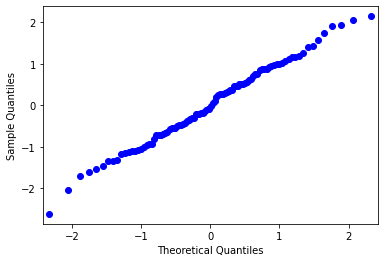

In [15]:
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt
plt.show(qqplot(ss.norm.rvs(size=100)))

In [11]:
#相关系数
import pandas as pd
s1=pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2=pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
s1.corr(s2)

0.9333729600465923

In [12]:
s1.corr(s2,method='spearman')

0.7142857142857144

In [14]:
#方法二
df = pd.DataFrame([s1,s2])
df.corr()

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
2,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
5,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


In [17]:
#转置
df=pd.DataFrame(np.array([s1,s2]).T)
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [18]:
df.corr(method='spearman')

,0,1
0,1.000000,0.714286
1,0.714286,1.000000


In [19]:
x=np.arange(10).astype(np.float).reshape((10,1))

In [20]:
y=x*3+4+np.random.random((10,1))

In [21]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [22]:
y

array([[ 4.23828876],
       [ 7.68232011],
       [10.17769937],
       [13.7542319 ],
       [16.04026598],
       [19.58444794],
       [22.81057484],
       [25.85438971],
       [28.12534955],
       [31.18345436]])

In [24]:
from sklearn.linear_model import LinearRegression
#线性回归
reg=LinearRegression()
res=reg.fit(x,y)   #拟合
y_pred = reg.predict(x)  #预测值
y_pred

array([[ 4.45316519],
       [ 7.45137343],
       [10.44958166],
       [13.4477899 ],
       [16.44599813],
       [19.44420637],
       [22.44241461],
       [25.44062284],
       [28.43883108],
       [31.43703931]])

In [26]:
#参数
reg.coef_

array([[2.99820824]])

In [27]:
#截距
reg.intercept_

array([4.45316519])

In [29]:
#主成分分析
data=np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [30]:
#降维
from sklearn.decomposition import PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
lower_dim.explained_variance_ratio_

array([0.96318131])

In [32]:
#得到转换后的数值
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [34]:
#自己动手实现PCA方法
import pandas as pd
import numpy as np
def myPCA(data,n_components=100000000):
    mean_vals=np.mean(data,axis=0)
    mid=data-mean_vals
    cov_mat=np.cov(mid,rowvar=False)#对列进行协方差计算
    from scipy import linalg
    eig_vals,eig_vects=linalg.eig(np.mat(cov_mat))
    eig_val_index=np.argsort(eig_vals)
    eig_val_index=eig_val_index[:-(n_components+1):-1]
    eig_vects=eig_vects[:,eig_val_index]
    low_dim_mat=np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals
data=np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
print(myPCA(data,n_components=1))

(array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))


#交叉分析

0.2891069046174478


AttributeError: module 'matplotlib' has no attribute 'show'

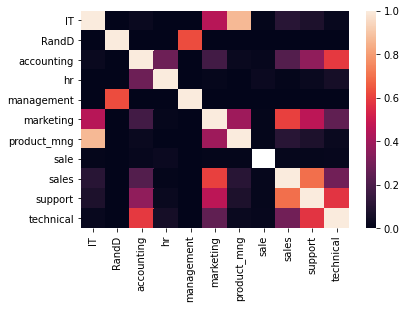

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
dp_indices = df.groupby(by='department').indices
sales_values=df['left'].iloc[dp_indices['sales']].values
technical_values=df['left'].iloc[dp_indices['technical']].values
#打印T统计量 
print(ss.ttest_ind(sales_values,technical_values)[1])
#两两求T值
dp_keys=list(dp_indices.keys())
dp_t_mat=np.zeros([len(dp_keys),len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value= ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,\
                               df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        dp_t_mat[i][j]=p_value
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)
plt.show()


AttributeError: module 'matplotlib' has no attribute 'show'

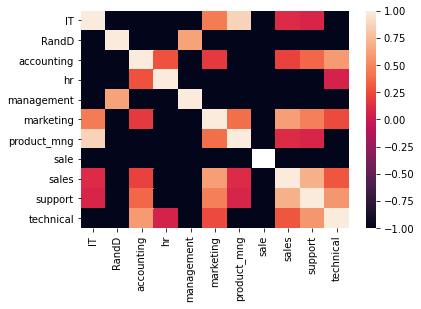

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
dp_indices = df.groupby(by='department').indices
sales_values=df['left'].iloc[dp_indices['sales']].values
technical_values=df['left'].iloc[dp_indices['technical']].values
#打印T统计量 
#print(ss.ttest_ind(sales_values,technical_values)[1])
#两两求T值
dp_keys=list(dp_indices.keys())
dp_t_mat=np.zeros([len(dp_keys),len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value= ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,\
                               df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value<0.05:
            dp_t_mat[i][j]=-1
        else:
            dp_t_mat[i][j]=p_value
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)
plt.show()  #所有黑色部分显示部门之间离职率有显著差异

AttributeError: module 'matplotlib' has no attribute 'show'

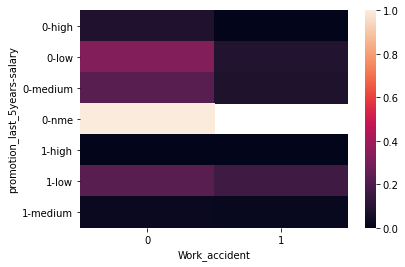

In [43]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
#2.通过交叉透视表方法实现
piv_tb = pd.pivot_table(df,values='left',index=['promotion_last_5years','salary'],\
                        columns=['Work_accident'],aggfunc=np.mean) #aggfunc聚合函数
#print(piv_tb)
sns.heatmap(piv_tb,vmin=0,vmax=1)
plt.show()  #颜色越浅离职率越高

AttributeError: module 'matplotlib' has no attribute 'show'

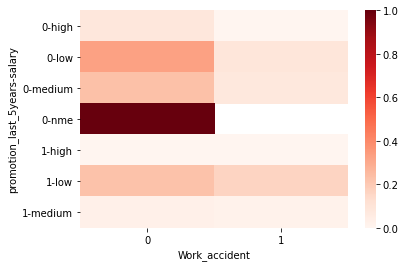

In [45]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
#调节字体
sns.set_context(font_scale=1.5)
piv_tb = pd.pivot_table(df,values='left',index=['promotion_last_5years','salary'],\
                        columns=['Work_accident'],aggfunc=np.mean) #aggfunc聚合函数
#print(piv_tb)
#改变显示颜色
sns.heatmap(piv_tb,vmin=0,vmax=1,cmap=sns.color_palette('Reds',n_colors=256))
plt.show()  #颜色越深离职率越高

AttributeError: module 'matplotlib' has no attribute 'show'

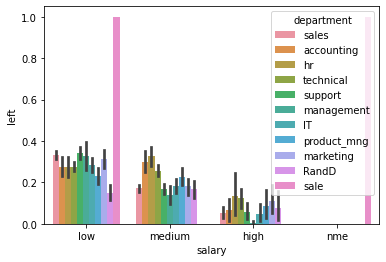

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
#分组分析--离散
sns.barplot(x='salary',y='left',hue='department',data=df)#向下钻取
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

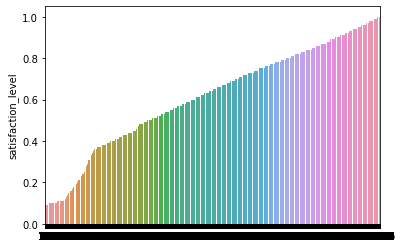

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
#连续情况
sl_s=df['satisfaction_level']
sns.barplot(list(range(len(sl_s))),sl_s.sort_values())
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

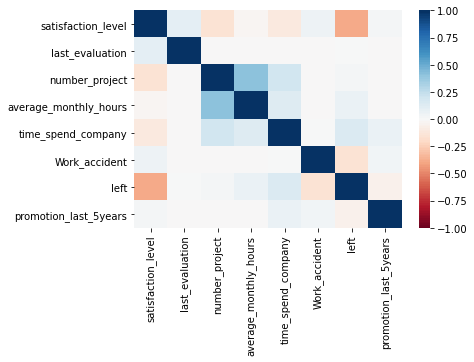

In [51]:
#相关分析
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('./data/HR.csv')
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()
#蓝色代表接近1-相关性较好，红色代表-1

In [57]:
#熵
s1=pd.Series(['X1','X1','X2','X2','X2','X2'])
s2=pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s)
    prt_ary=df.groupby(s).count().values/float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()
#print('Entropy:',getEntropy(s1))
print('Entropy:',getEntropy(s2))  

Entropy: 10.0


In [59]:
#条件熵
def getCondEntropy(s1,s2):
    d=dict()
    for i in list(range(len(s1))):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d])
#print('CondEntropy',getCondEntropy(s1,s2))
print('CondEntropy',getCondEntropy(s2,s1))  #不对称

CondEntropy 4.591479170272448


In [62]:
#熵增益
def getEntropyGain(s1,s2):
    return getEntropy(s2)-getCondEntropy(s1,s2)
print('EntropyGain:',getEntropyGain(s2,s1))   #对称

EntropyGain: 4.591479170272448


In [64]:
#熵增益率
def getEntropyGainRatio(s1,s2):
    return getEntropyGain(s1,s2)/getEntropy(s2)
#print('EntropyGainRatio:',getEntropyGainRatio(s1,s2))
print('EntropyGainRatio:',getEntropyGainRatio(s2,s1))  #不对称

EntropyGainRatio: 0.5


In [69]:
import math
#衡量离散值的相关性
def getDiscreteCorr(s1,s2):
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))
print('DiscreteCorr:',getDiscreteCorr(s2,s1))  #对称

DiscreteCorr: 0.47913876749186385


In [4]:
import pandas as pd
import numpy as np
s1=pd.Series(['X1','X1','X2','X2','X2','X2'])
s2=pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])
#Gini---1求概率平方和
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    #prt_ary = np.array(pd.groupby(s,by=s).count().values/float(len(s)))
    prt_ary = df.groupby(s).count().values/float(len(s))
    return sum(prt_ary**2)
def getGini(s1,s2):
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
    return 1-sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d])
print('Gini',getGini(s1,s2))

AttributeError: module 'pandas' has no attribute 'groupby'

In [81]:
df=df.where(df['satisfaction_level']!='NaN').dropna()

d:\chen\biancheng\jupytertest\venv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Ratio: [9.98565340e-01 8.69246970e-04 4.73865973e-04 4.96932182e-05
 2.43172315e-05 9.29496619e-06 8.24128218e-06]


AttributeError: module 'matplotlib' has no attribute 'show'

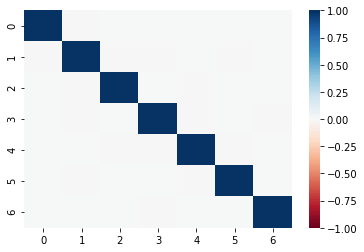

In [83]:
df=df.where(df['salary']!='nme').dropna()
#因子分析（成分分析）---要求数据是经过异常值处理的
from sklearn.decomposition import PCA
my_pca=PCA(n_components=7)
lower_mat=my_pca.fit_transform(df.drop(labels=['salary','department','left'],axis=1))
print('Ratio:',my_pca.explained_variance_ratio_)
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()#主成分分析把原来的空间转换为正交的特征空间